In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# read in datasets
train_og = pd.read_csv('data/train.csv')

test = pd.read_csv('data/test.csv')

In [3]:
# split train into test and validation
train, validation = train_test_split(train_og,train_size=0.8,random_state=42)

# split into the respective X and y frames
y_train = train.iloc[:,0]
X_train = train.drop(train.columns[0],axis=1)

y_validation = validation.iloc[:,0]
X_validation = validation.drop(validation.columns[0],axis=1)

y_test = test.iloc[:,0]
X_test = test.drop(test.columns[0],axis=1)

In [4]:
import torch
import torch.nn as nn
import torchvision.ops as ops
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

In [28]:
"""
creates the data relative to tensors

@X_-- features to train
@y_-- classes to predict relative to features

@X_---_tensors feature set as tensors
@y_---_tensors classes to predict relative to features as tensors
@train_loader training dataset

"""
def create_data(X_train, y_train, X_validation, y_validation, X_test, y_test):
    X_train_tensors = torch.tensor(X_train.values,dtype=torch.float32)
    y_train_tensors = torch.tensor(y_train.values,dtype=torch.long)

    dataset_train = TensorDataset(X_train_tensors,y_train_tensors)
    train_loader = DataLoader(dataset_train,batch_size=300,shuffle=True)

    X_validation_tensors = torch.tensor(X_validation.values,dtype=torch.float32)
    y_validation_tensors = torch.tensor(y_validation.values,dtype=torch.long)

    X_test_tensors = torch.tensor(X_test.values,dtype=torch.float32)
    y_test_tensors = torch.tensor(y_test.values,dtype=torch.long)

    return train_loader, X_validation_tensors, y_validation_tensors, X_test_tensors, y_test_tensors

In [6]:
# creates data into tensors for pytorch model
train_loader, X_validation_tensors, y_validation_tensors, X_test_tensors, y_test_tensors = create_data(X_train, y_train, X_validation, y_validation, X_test, y_test)

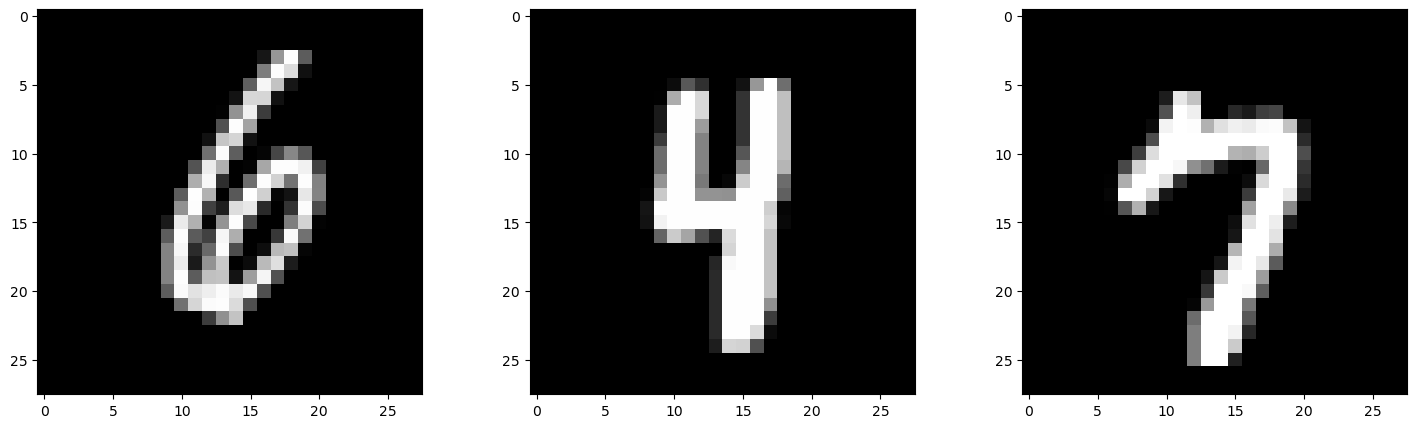

In [7]:
import matplotlib.pyplot as plt

#plots the first three images from the dataset
plt.figure(figsize=(18, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(X_train.iloc[i].values.reshape(28,28), cmap='gray')
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

In [8]:
#!pip install torch

In [9]:
import torch 
import torch.nn as nn
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [10]:
output_size = 10 # number of predictable classes
input_size = X_train.columns[0:].shape[0] # number of features

# Base Model

In [11]:
model = nn.Sequential(
    nn.Linear(input_size,28), # hidden layer
    nn.ReLU(), # activation
    nn.Linear(28,32), # hidden layer
    nn.ReLU(), # activation
    nn.Linear(32,output_size), # ouput
)

criterion = nn.CrossEntropyLoss() # loss function
optimizer = optim.Adam(model.parameters(),lr=0.001) # optimizer

In [13]:
"""
trains the neural network on the training data and prints the Training Plot Convergence diagram

@loader datasetloader for train data
@model model to train
"""
def train_nn(model,loader):
    num_epochs = 100
    loss_values = []

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        # Variables to accumulate predictions and true labels
        all_preds = []
        all_labels = []
        num_batches = 0
        running_loss = 0.0

        for X_batch, y_batch in loader:
            # Forward pass: compute the output of the model
            outputs = model(X_batch)
            
            # Compute the loss
            loss = criterion(outputs, y_batch)

            # Backward pass: compute gradients
            optimizer.zero_grad()  # Clear previous gradients
            loss.backward()        # Backpropagation

            # Update the weights
            optimizer.step()

            # Convert model outputs to predicted class indices
            _, predicted = torch.max(outputs, 1)

            # Accumulate predictions and true labels
            all_preds.extend(predicted.cpu().numpy())  # Convert to numpy and store
            all_labels.extend(y_batch.cpu().numpy())   # Convert to numpy and store
             # Accumulate the loss
            
            running_loss += loss.item()
            num_batches += 1  # Keep track of number of batches

        # Compute average loss for this epoch
        avg_loss = running_loss / num_batches
        loss_values.append(avg_loss)  # Store the average loss for this epoch
            
        # Compute metrics at the end of the epoch
        accuracy = accuracy_score(all_labels, all_preds)
        f1 = f1_score(all_labels, all_preds, average='weighted') 
        recall = recall_score(all_labels,all_preds, average='weighted')
        precision = precision_score(all_labels,all_preds,average='weighted')


        # Print loss, accuracy, and F1 score every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, Loss: {loss.item():.4f},')
    plt.figure(figsize=(8, 6))
    plt.plot(range(num_epochs), loss_values, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Convergence (Loss vs Epochs)')
    plt.grid(True)
    plt.show()
    print(f'Training Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}, F1: {f1:.4f}, Recall: {recall}')
    #return loss.item(), accuracy, f1, recall

Epoch [10/100], Accuracy: 0.9640, Precision: 0.9640, Recall: 0.9640, F1 Score: 0.9640, Loss: 0.0951,
Epoch [20/100], Accuracy: 0.9776, Precision: 0.9776, Recall: 0.9776, F1 Score: 0.9776, Loss: 0.0989,
Epoch [30/100], Accuracy: 0.9852, Precision: 0.9852, Recall: 0.9852, F1 Score: 0.9852, Loss: 0.0388,
Epoch [40/100], Accuracy: 0.9879, Precision: 0.9879, Recall: 0.9879, F1 Score: 0.9879, Loss: 0.0309,
Epoch [50/100], Accuracy: 0.9903, Precision: 0.9903, Recall: 0.9903, F1 Score: 0.9903, Loss: 0.0306,
Epoch [60/100], Accuracy: 0.9910, Precision: 0.9910, Recall: 0.9910, F1 Score: 0.9910, Loss: 0.0337,
Epoch [70/100], Accuracy: 0.9922, Precision: 0.9922, Recall: 0.9922, F1 Score: 0.9922, Loss: 0.0339,
Epoch [80/100], Accuracy: 0.9937, Precision: 0.9937, Recall: 0.9937, F1 Score: 0.9937, Loss: 0.1184,
Epoch [90/100], Accuracy: 0.9891, Precision: 0.9891, Recall: 0.9891, F1 Score: 0.9891, Loss: 0.0332,
Epoch [100/100], Accuracy: 0.9939, Precision: 0.9939, Recall: 0.9939, F1 Score: 0.9939, Los

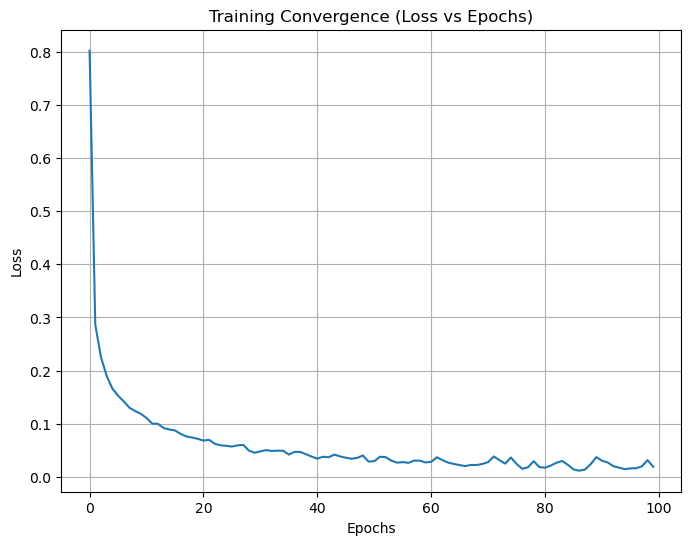

Training Loss: 0.0123, Accuracy: 0.9939, F1: 0.9939, Recall: 0.9939373736952853


In [14]:
train_nn(model,train_loader) # train experiment 1

In [15]:
"""
Evaluates the model on other data

@model model currently evaluating
@X_set features evaluating 
@y_set ground truth classes
"""
def evaluation_nn(model, X_set, y_set):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []
    with torch.no_grad():  # No need to calculate gradients for validation/testing
        outputs = model(X_set)
        val_loss = criterion(outputs, y_set)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())  # Convert to numpy and store
        all_labels.extend(y_set.cpu().numpy())   # Convert to numpy and store
        accuracy = accuracy_score(all_labels, all_preds)
        f1 = f1_score(all_labels, all_preds, average='weighted')  # For multi-class problems
        recall = recall_score(all_labels,all_preds, average='weighted')
        precision = precision_score(all_labels,all_preds, average='weighted')
        
        print(f'Loss: {val_loss.item():.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f},  Recall: {recall:.4f}, F1 Score: {f1:.4f}')


In [16]:
evaluation_nn(model,X_validation_tensors, y_validation_tensors) # evaluation on validation set experiment 1

Loss: 0.4183, Accuracy: 0.9587, Precision: 0.9589,  Recall: 0.9587, F1 Score: 0.9588


In [17]:
evaluation_nn(model,X_test_tensors, y_test_tensors) # evaluation of test set experiment 1

Loss: 0.3786, Accuracy: 0.9580, Precision: 0.9581,  Recall: 0.9580, F1 Score: 0.9580


# Ablation Studies

In [18]:
model_2 = nn.Sequential(
    nn.Linear(input_size,28), # input
    nn.ReLU(), # activation
    nn.Linear(28,32), # hidden layer
    nn.ReLU(), # activation
    nn.Linear(32,20), # hidden layer -- additional
    nn.ReLU(), # activation -- additional
    nn.Linear(20,output_size), # ouput
)

criterion = nn.CrossEntropyLoss() # loss function
optimizer = optim.Adam(model_2.parameters(),lr=0.001) # optimizer

Epoch [10/100], Accuracy: 0.9670, Precision: 0.9670, Recall: 0.9670, F1 Score: 0.9670, Loss: 0.1625,
Epoch [20/100], Accuracy: 0.9780, Precision: 0.9780, Recall: 0.9780, F1 Score: 0.9780, Loss: 0.0392,
Epoch [30/100], Accuracy: 0.9844, Precision: 0.9844, Recall: 0.9844, F1 Score: 0.9844, Loss: 0.0793,
Epoch [40/100], Accuracy: 0.9853, Precision: 0.9853, Recall: 0.9853, F1 Score: 0.9853, Loss: 0.0573,
Epoch [50/100], Accuracy: 0.9883, Precision: 0.9883, Recall: 0.9883, F1 Score: 0.9883, Loss: 0.0701,
Epoch [60/100], Accuracy: 0.9911, Precision: 0.9911, Recall: 0.9911, F1 Score: 0.9911, Loss: 0.0164,
Epoch [70/100], Accuracy: 0.9920, Precision: 0.9920, Recall: 0.9920, F1 Score: 0.9920, Loss: 0.0306,
Epoch [80/100], Accuracy: 0.9940, Precision: 0.9940, Recall: 0.9940, F1 Score: 0.9940, Loss: 0.0214,
Epoch [90/100], Accuracy: 0.9911, Precision: 0.9911, Recall: 0.9911, F1 Score: 0.9911, Loss: 0.0123,
Epoch [100/100], Accuracy: 0.9938, Precision: 0.9938, Recall: 0.9938, F1 Score: 0.9938, Los

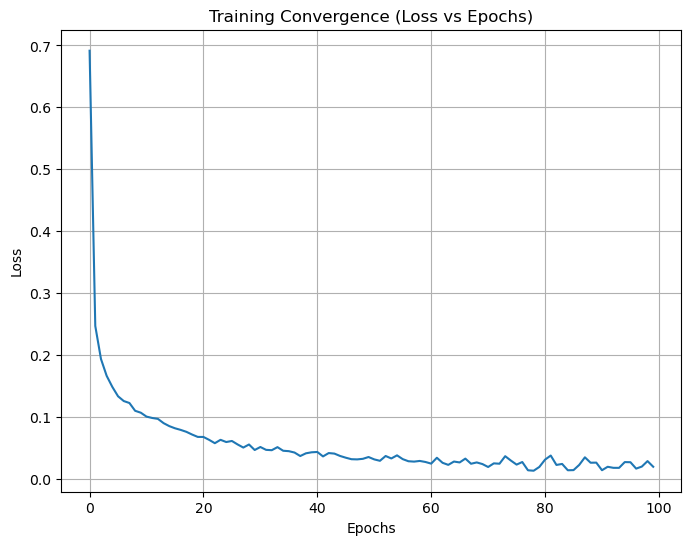

Training Loss: 0.0420, Accuracy: 0.9938, F1: 0.9938, Recall: 0.9938332048584345


In [19]:
train_nn(model_2,train_loader) # train on experiment 2

In [20]:
evaluation_nn(model_2,X_validation_tensors,y_validation_tensors) # validation experiment 2

Loss: 0.3889, Accuracy: 0.9567, Precision: 0.9569,  Recall: 0.9567, F1 Score: 0.9568


In [21]:
evaluation_nn(model_2,X_test_tensors,y_test_tensors) # validation experiment 2

Loss: 0.3284, Accuracy: 0.9584, Precision: 0.9586,  Recall: 0.9584, F1 Score: 0.9584


In [22]:
model_3 = nn.Sequential(
    nn.Linear(input_size,28), # input
    nn.ReLU(), # activation
    nn.Linear(28,output_size), # ouput
)

Epoch [10/100], Accuracy: 0.0870, Precision: 0.0926, Recall: 0.0870, F1 Score: 0.0731, Loss: 22.0777,
Epoch [20/100], Accuracy: 0.0870, Precision: 0.0926, Recall: 0.0870, F1 Score: 0.0731, Loss: 21.7925,
Epoch [30/100], Accuracy: 0.0870, Precision: 0.0926, Recall: 0.0870, F1 Score: 0.0731, Loss: 22.4590,
Epoch [40/100], Accuracy: 0.0870, Precision: 0.0926, Recall: 0.0870, F1 Score: 0.0731, Loss: 21.0306,
Epoch [50/100], Accuracy: 0.0870, Precision: 0.0926, Recall: 0.0870, F1 Score: 0.0731, Loss: 21.8417,
Epoch [60/100], Accuracy: 0.0870, Precision: 0.0926, Recall: 0.0870, F1 Score: 0.0731, Loss: 22.3206,
Epoch [70/100], Accuracy: 0.0870, Precision: 0.0926, Recall: 0.0870, F1 Score: 0.0731, Loss: 22.0514,
Epoch [80/100], Accuracy: 0.0870, Precision: 0.0926, Recall: 0.0870, F1 Score: 0.0731, Loss: 24.1598,
Epoch [90/100], Accuracy: 0.0870, Precision: 0.0926, Recall: 0.0870, F1 Score: 0.0731, Loss: 23.1226,
Epoch [100/100], Accuracy: 0.0870, Precision: 0.0926, Recall: 0.0870, F1 Score: 0.

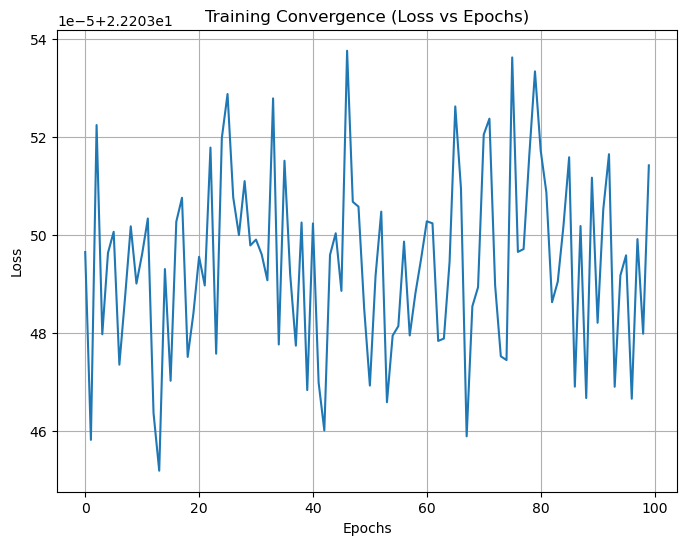

Training Loss: 23.2530, Accuracy: 0.0870, F1: 0.0731, Recall: 0.08704348007250151


In [23]:
train_nn(model_3,train_loader) # train on experiment 2

In [24]:
evaluation_nn(model_3,X_validation_tensors,y_validation_tensors) # validation experiment 2

Loss: 22.2352, Accuracy: 0.0840, Precision: 0.0936,  Recall: 0.0840, F1 Score: 0.0707


In [25]:
evaluation_nn(model_3,X_test_tensors,y_test_tensors)

Loss: 22.7462, Accuracy: 0.0836, Precision: 0.0836,  Recall: 0.0836, F1 Score: 0.0702
